# Analysing the coursera data and generating the insights

In [24]:
#importing the basic libraries
import pandas as pd 
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sb
import matplotlib.pyplot as plt

In [25]:
#reading and understanding the data
data=pd.read_csv('coursea_data.csv',index_col='Unnamed: 0')
data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [26]:
#indexing the data properly
data.index=np.arange(1,len(data)+1)

In [27]:
#gathering the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


In [29]:
#Capitalising the titles of the data
c=[]
a=data.columns
for i in a:
    c.append((str.title(i)))
data.columns=c
data

,Course_Title,Course_Organization,Course_Certificate_Type,Course_Rating,Course_Difficulty,Course_Students_Enrolled
1,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
2,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
3,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
4,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
5,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
...,...,...,...,...,...,...
887,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
888,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
889,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
890,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k


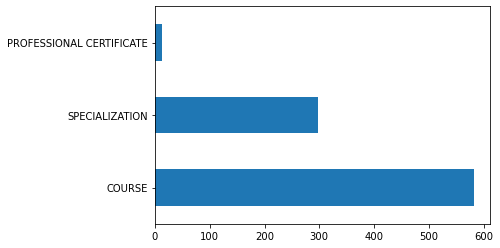

In [39]:
#getting the insights on most enrolled course certificate type
data.Course_Certificate_Type.value_counts().plot.barh()

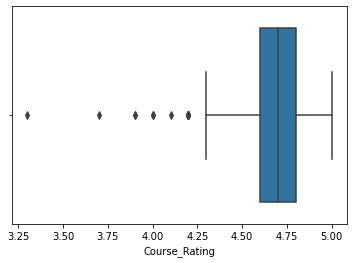

In [31]:
#visualising the course rating columns
sb.boxplot(data.Course_Rating)
sb.set_style()

Seems that most courses have got good ratings

In [32]:
data

,Course_Title,Course_Organization,Course_Certificate_Type,Course_Rating,Course_Difficulty,Course_Students_Enrolled
1,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
2,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
3,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
4,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
5,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
...,...,...,...,...,...,...
887,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
888,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
889,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
890,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k


In [33]:
#Enginnering the Student enrolled and making it numerical feature
data.Course_Students_Enrolled = data.Course_Students_Enrolled.apply(lambda x : float(str(x).replace('k',''))*1000 if str(x).endswith('k') else float(str(x).replace('m',''))*100000)

In [35]:
#top 10 course in which student enrolled
largest_10=data.nlargest(10,'Course_Students_Enrolled')
largest_10

,Course_Title,Course_Organization,Course_Certificate_Type,Course_Rating,Course_Difficulty,Course_Students_Enrolled
197,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830000.0
130,Career Success,"University of California, Irvine",SPECIALIZATION,4.4,Beginner,790000.0
262,English for Career Development,University of Pennsylvania,COURSE,4.8,Mixed,760000.0
766,Successful Negotiation: Essential Strategies a...,University of Michigan,COURSE,4.8,Mixed,750000.0
200,Data Science: Foundations using R,Johns Hopkins University,SPECIALIZATION,4.6,Beginner,740000.0
212,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,690000.0
627,Neural Networks and Deep Learning,deeplearning.ai,COURSE,4.9,Intermediate,630000.0
427,Improve Your English Communication Skills,Georgia Institute of Technology,SPECIALIZATION,4.7,Beginner,610000.0
19,Academic English: Writing,"University of California, Irvine",SPECIALIZATION,4.7,Beginner,540000.0
114,Business Foundations,University of Pennsylvania,SPECIALIZATION,4.7,Beginner,510000.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

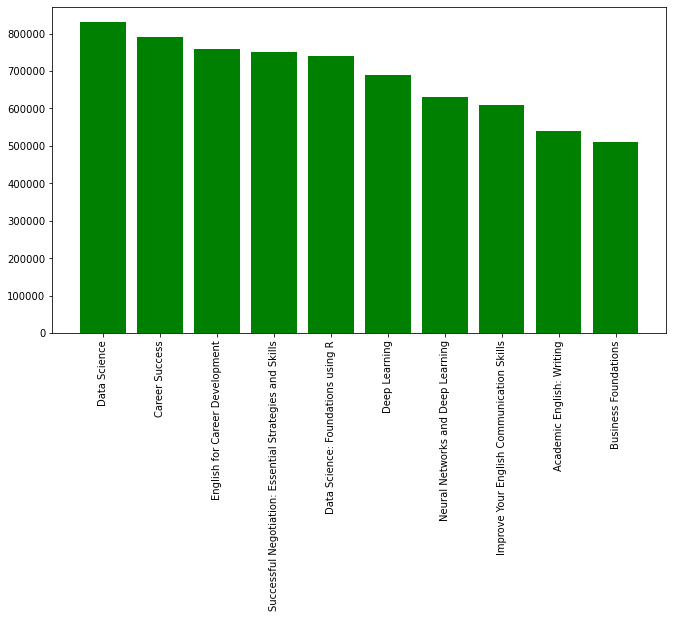

In [36]:
#visualising the top 10 coused by student enrolled no.
plt.figure(figsize=(11,6))
plt.bar(largest_10.Course_Title,largest_10.Course_Students_Enrolled,color="green")
plt.xticks(rotation=90)

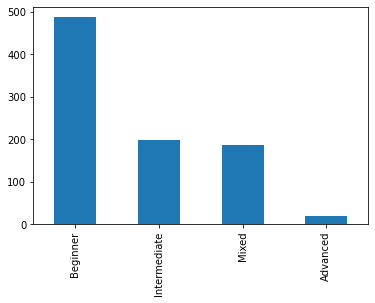

In [20]:
data.Course_Difficulty.value_counts().plot.bar()

  Course_Difficulty  Course_Students_Enrolled
0          Advanced                 1264400.0
1          Beginner                38571800.0
2      Intermediate                14506300.0
3             Mixed                18689400.0


<BarContainer object of 4 artists>

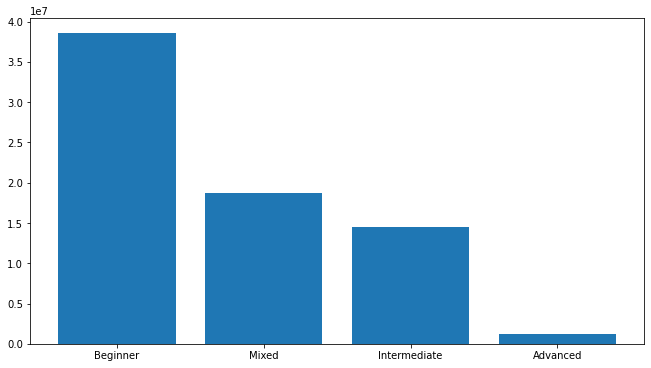

In [38]:
#grouping the courses_student_enrolled by Course Difficulty
g=data.groupby('Course_Difficulty')['Course_Students_Enrolled'].sum().reset_index()
print(g)
#visualising it
plt.figure(figsize=(11,6))
plt.bar(g1.Course_Difficulty,g1.Course_Students_Enrolled)

#### Insights from the datasets
1.There are very low no. of people who go for the professional ceritificate which means there are low no. of professional courses from professional institutes.

2.Top courses are in the field of business, career growth and analystics.

3.Most courses have got good ratings.

4.Mostly normal people come here are beginners who are looking for the courses as they start from the scratch.